# HH3 Left To Right


# Setup

In [1]:
#Gian Carlo Replicating the code
#Installments
!pip install saxpy
!pip install playsound
!pip install simpleaudio 

# Importing librarys and packages

import numpy as np



from saxpy.znorm import znorm
from saxpy.paa   import paa
from saxpy.sax   import ts_to_string
from saxpy.alphabet import cuts_for_asize
from saxpy.sax   import sax_via_window


import matplotlib.pyplot as plt

import simpleaudio as sa


import csv
import pandas as pd

## Importing Motion Data File

In [2]:
### Importing a motion data file
# "header = None" b/c the file has no headers

data1= pd.read_csv("CLASS_WALK_l2r/l2rTrial1.tsv", sep = '\t', header = 0)


# View a column of the file
data1["Sonar 3"]


0     5000
1     5000
2     5000
3     5000
4     5000
      ... 
73    1014
74    1014
75    1014
76    1014
77    1014
Name: Sonar 3, Length: 78, dtype: int64

We can isolate the three desired sensors: 0, 3, and 6, which correspond to Left, Middle, and Right respectively. 


In [14]:
# Isolate and rename the time series for left, middle, and right sensors
left = data1["Sonar 0"]
middle = data1["Sonar 3"]
right = data1["Sonar 6"]

# Check that the data copied correctly
middle

0     5000
1     5000
2     5000
3     5000
4     5000
      ... 
73    1014
74    1014
75    1014
76    1014
77    1014
Name: Sonar 3, Length: 78, dtype: int64

In [10]:
# Normalize the data.
left = znorm(left)
middle = znorm(middle)
right = znorm(right)


## Graphing all three sensors



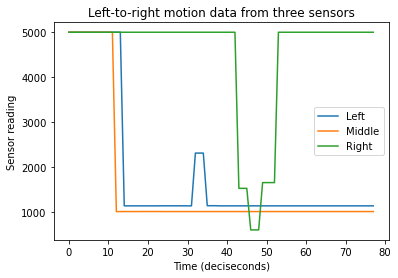

In [4]:
# Plot the data on a graph (using default pyplot settings) just as a basic visualization

plt.plot(left, label="Left")
plt.plot(middle, label="Middle")
plt.plot(right, label="Right")
plt.title("Left-to-right motion data from three sensors")
plt.xlabel("Time (deciseconds)")
plt.ylabel("Sensor reading")
plt.legend()
plt.show()

# Making a "melody" function
Let's define a function for our generated melody, so that we don't have to write it out every time.

In [21]:
def melody(sax, black_box):
    if not black_box:print("Starting playback...")
        
    # Iterate through the characters
    for char in sax:
            # Print the current letter
            if not black_box: print(char, end="")
                
                
             # Test for each character and play the correct note
            if char == "a":
                sound = sa.WaveObject.from_wave_file("soundFiles/a_low.wav").play()
            elif char == "b":
                sound = sa.WaveObject.from_wave_file("soundFiles/b.wav").play()
            elif char == "c":
                sound = sa.WaveObject.from_wave_file("soundFiles/db.wav").play()
            elif char == "d":
                sound = sa.WaveObject.from_wave_file("soundFiles/d.wav").play()
            elif char == "e":
                sound = sa.WaveObject.from_wave_file("soundFiles/e.wav").play()
            elif char == "f":
                sound = sa.WaveObject.from_wave_file("soundFiles/gb.wav").play()
            elif char == "g":
                sound = sa.WaveObject.from_wave_file("soundFiles/ab.wav").play()
#             elif char == "h": # doesn't ensure "sound" is defined
            else:
                sound = sa.WaveObject.from_wave_file("soundFiles/a.wav").play()
            # Wait for each sound to finish before playing next one
            sound.wait_done()
    
    if not black_box: print("\nFinished!")

# Comparing different patients¶
The PhysioNet contest from which these data are taken (the "training" dataset) involved, as the title would suggest, "Predicting Acute Hypotensive Episodes." As such, the training data includes patients with and without periods of acute hypotension, as well as those who experienced hypotension before or after the data were collected. There are a wide variety of data. Hopefully we can see -- and hear -- as much.
# Function to do everything in one step
Below I will define a function for running the whole procedure (read in data --> znorm --> PAA --> SAX) on any given data file, and then another which adds the melody. (It's useful to be able to call your sound up on cue.)

In [45]:
# Take one of the data files and return the sax string
# - data_file: path to the .dat file from MIMIC II
# - black_box: FALSE if you want graphs and feedback displayed;
#              TRUE if, well, you don't.

def saxify(data_file, black_box):
    # Read in the data file.
    data = pd.read_csv(data_file, sep = '\t', header = 0)
    
    # Give the left, middle, and right sensors their names.
    left = data["Sonar 0"]
    middle = data["Sonar 3"]
    right = data["Sonar 6"]

    # Graph the raw data (if desired)
    if not black_box:
        plt.plot(left, label="Left")
        plt.plot(middle, label="Middle")
        plt.plot(right, label="Right")
        plt.title("Motion data—3 sensors\n{}".format(data_file))
        plt.xlabel("Time (deciseconds)")
        plt.ylabel("Sensor reading")
        plt.legend()
        plt.show()
        
    # Normalize the data
    left = znorm(left)
    middle = znorm(middle)
    right = znorm(right)
    
    # Apply PAA
    # "Real time" playback = length/5 (time series in 0.1s, notes ~0.5s long)
    paa_size = len(data) // 5
    if not black_box: print("PAA size =", paa_size)
    paa_left = paa(left, paa_size)
    paa_middle = paa(middle, paa_size)
    paa_right = paa(right, paa_size)
        
    # Create SAX string
    sax_left = ts_to_string(paa_left, cuts_for_asize(8))
    sax_middle = ts_to_string(paa_middle, cuts_for_asize(8))
    sax_right = ts_to_string(paa_right, cuts_for_asize(8))
    # .. and display if desired
    if not black_box:
        print("SAX strings:", "\n  Left: ", sax_left, "\n  Middle: ", sax_middle, "\n  Right: ", sax_right)
        
    # Return a tuple of the 3 SAX strings
    return sax_left, sax_middle, sax_right
    

    # currently broken -- won't take a tuple result from saxify
# # Just a function that calls saxify() and melody() in sequence.
# def sonify(data_file, black_box):
#     melody(saxify(data_file, black_box), black_box)

# Demo for presentation
Here we call saxify() and melody() separately.

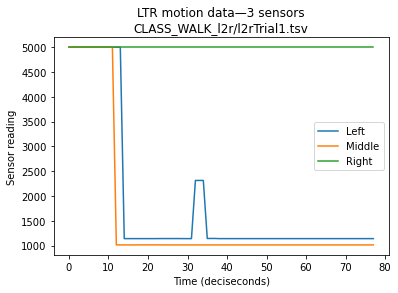

PAA size = 15
SAX strings: 
  Left:  hhhcccdcccccccc 
  Middle:  hhfcccccccccccc 
  Right:  hhhhhhhhhhhhhhh


In [16]:
sax_1 = saxify("CLASS_WALK_l2r/l2rTrial1.tsv", black_box = False)

In [34]:
melody(sax_1[0], False)

Starting playback...
hhhcccdcccccccc
Finished!


In [35]:
melody(sax_1[1], False)

Starting playback...
hhfcccccccccccc
Finished!


In [36]:
melody(sax_1[2], False)

Starting playback...
hhhhhhhhhhhhhhh
Finished!


## Testing a RTL file

Let's see if it works with one of the right to left files, too.  (I used a random number picker to select which file.)

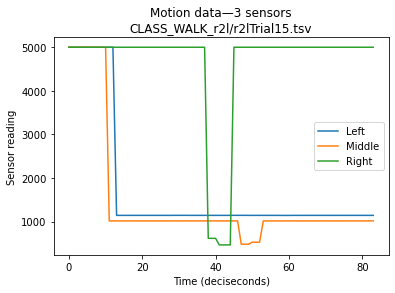

PAA size = 16
SAX strings: 
  Left:  hhgccccccccccccc 
  Middle:  hhdccccccbcccccc 
  Right:  eeeeeeeaaeeeeeee


In [46]:
sax_2 = saxify("CLASS_WALK_r2l/r2lTrial15.tsv", black_box = False)

In [40]:
melody(sax_2[0], black_box = False)

Starting playback...
hhgccccccccccccc
Finished!


In [41]:
melody(sax_2[1], black_box = False)

Starting playback...
hhdccccccbcccccc
Finished!


In [44]:
melody(sax_2[2], black_box = False)

Starting playback...
eeeeeeeaaeeeeeee
Finished!
